# Lab07 - Analytical and Numerical Differentiation

**Daniel Leskiewicz**

## Introduction

Within the lab, we use the derivatives and approximating the values from the derivatives in order to find the best parameter for our model to minimize the error of the model. We start with working with the term "h" which is the delta that we are using to move through the derivative and how that impacts the accuracy of our approximations. Then later in the lab, we use the meshgrid grid search method to fine parameters on the derivative space for the 1 and 2 parameter model.


### Questions:

1. For experiment 1, how did your approximated derivatives (numerical solutions)compare to the analytical solution. Describe what effect the h term had on the accuracy of the approximation. Discuss considerations/tradeoffs when picking an optimal h value.
 - Well, the smaller h value of the approximated derivative gets us closer to the actual derivative value. It also seems that the smaller the h value the more computationally expensive it will become. In addition, if the h value that we use is to large then the model's accuracy will go down. 


2. In experiment 2 you should have found both local extrema of the function. Describe what information the derivative provides and how you found these extrema. If each numerical approximation of the derivative didn’t always lead to both extrema of the function, explain why.
 - During the lab, I found the extrema by finding the values closet to zero of the approximated derivative. The derivative gives us the slope of the line at each points and a point on that line is a extrema of zero. So within the lab, the values that I got were good for the approximation function, and the larger the value of h the inaccurate the extrema values become because we are shifting away more so from the closet zero point. 


3. Be creative - brainstorm a way that you could leverage the information of the derivative to only find the minima, not all extrema.
 - Well, if you want to leverage the informaiton to only find the minima then you can check the left and right values and if the values on the left are negative and on the right are positive then you have found your minima, if its the opposite then it is the maxima which is wrong.
 

4. For experiment 3, you performed another grid search. Compare and contrast what features you were looking for in the error-space grid search (lab 06) and the derivativespace grid search. Make sure to compare the computational complexity between these spaces. Depending on your answer do you think it makes more sense to perform a grid search in error space or derivative space?
 - Well, during this lab I was using grid search to find the estimated derivative points of the cost function within the feature space. While within the last lab we used the cost function on each point to find the best parameters within the feature space. They both used the same GCF cost function. For the gradient method we used the same cost function once for each parameter for each point, so there is more computationailly expensive to run than just to calculate the cost of each point. Therefore, it makes a bit more appealing to perform grid search in the error space than the derivative space.


5. Be even more creative – brainstorm a way (or algorithm) that you could use to leverage the gradient, without having to use a grid search method.
 - Well I guess we can get the calculatd value of the derivative at one point, then we can use that value to adjust if we have to shift to the left or right based off the number that is returned. You would have to keep calculating this value over and over again. So like mentioned in class, we would be following the gradient until finding this minima. This can possibly be less computationally expensive depending on how many points you have to compute to get to this minima. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cost_functions import GaussianCostFunction
from test_Numerical_Differentiation import *
from Numerical_Differentiation import NumericalDifferentiation
from scipy import optimize

### Testing Numerical_Differentiation.py

In [2]:
!python test_Numerical_Differentiation.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


## Experiment 1: Analytical vs Numercial Differentiation

### Part 1

#### Cubic Model:
 $$ f(x) = x^3-3x^2-144x+432 $$
 
#### Derivative of the Cubic Model:
 $$ f(x) = 3x^2-6x-144 $$

### Part 2: Plotting the function f(x) and f'(x)

In [3]:
def f(x):
    return (x**3) - (3*(x**2)) - (144*x) + 432
def fprime(x):
    return (3*(x**2)) - (6*x) - 144

In [4]:
#plot of 2700 points
X = np.linspace(-12, 15, 2700) 

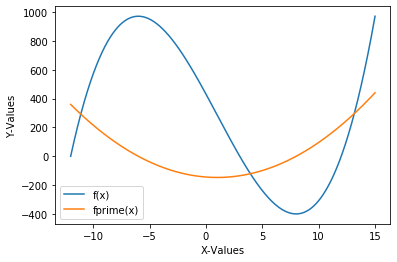

In [5]:
plt.plot(X, f(X), label='f(x)')
plt.plot(X, fprime(X), label='fprime(x)')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.legend()

### Part 3: Numerical Method to plot H values
#### Equation: Numerical Differentiation
$$ f(x) = f(x+h) - f(x) / h $$

In [6]:
#Creating different h values for the fprime function, we are using the original
#We are using the linspace x values with a value of h
def fprime_num_diff(x,h):
    return (f(x+h) - f(x)) / h

In [7]:
hvalue_001 = fprime_num_diff(X, 0.01)
hvalue_01 = fprime_num_diff(X, 0.1)
hvalue_1 = fprime_num_diff(X, 1)
hvalue_2 = fprime_num_diff(X, 2)

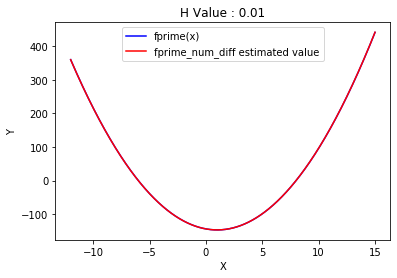

In [8]:
#first plot
plt.plot(X, fprime(X), c='b', label='fprime(x)')
plt.plot(X, hvalue_001, c='r', label='fprime_num_diff estimated value')
plt.title('H Value : 0.01')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

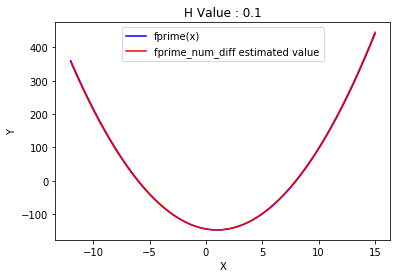

In [9]:
#second plot
plt.plot(X,fprime(X), c='b', label='fprime(x)')
plt.plot(X, hvalue_01, c='r', label='fprime_num_diff estimated value')
plt.title('H Value : 0.1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

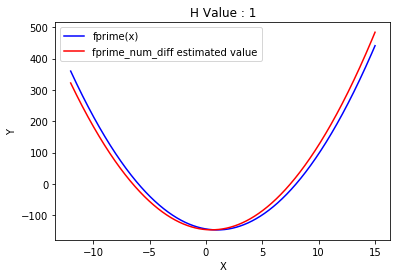

In [10]:
#third plot
plt.plot(X,fprime(X), c='b',label='fprime(x)' )
plt.plot(X, hvalue_1, c='r', label='fprime_num_diff estimated value' )
plt.title('H Value : 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

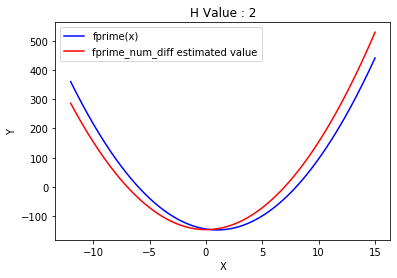

In [11]:
#fourth plot
plt.plot(X, fprime(X), c='b',label='fprime(x)' )
plt.plot(X, hvalue_2, c='r',label='fprime_num_diff estimated value' )
plt.title('H Value : 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

## Experiment 2: 1-Dimensional Grid Search - Derivative Space

### Part 1: Analytical Solution for the derivative where the derivative is equal to zero.

![](d.jpg)

### Part 2: Using the x-values we foudn create a figure that has them on a line

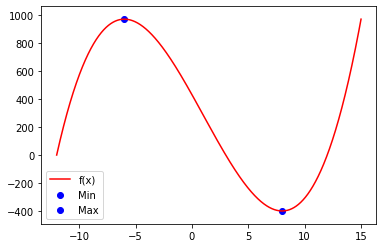

In [12]:
plt.plot(X, f(X), c='r', label='f(x)')
plt.scatter(-6, f(-6), c='b', label='Min')
plt.scatter(8, f(8), c='b', label='Max')
plt.legend()

### Part 3: Copy the Vectors that you used to store the derivatives numerical approximations

In [13]:
hvalue_001 = fprime_num_diff(X, 0.01)
hvalue_01 = fprime_num_diff(X, 0.1)
hvalue_1 = fprime_num_diff(X, 1)
hvalue_2 = fprime_num_diff(X, 2)

### Part 4: Use slicing techniques, search through each of the approximated derivates vectors to find the locations.

In [14]:
X_1 = X[:len(X)//2]
X_2 = X[len(X)//2:]

hvalue_001l = fprime_num_diff(X_1, 0.01)
hvalue_01l = fprime_num_diff(X_1, 0.1)
hvalue_1l = fprime_num_diff(X_1, 1)
hvalue_2l = fprime_num_diff(X_1, 2)

hvalue_001r = fprime_num_diff(X_2, 0.01)
hvalue_01r = fprime_num_diff(X_2, 0.1)
hvalue_1r = fprime_num_diff(X_2, 1)
hvalue_2r = fprime_num_diff(X_2, 2)

h001_left = X_1[np.abs(hvalue_001l).argmin()]
h001_right = X_2[np.abs(hvalue_001r).argmin()]

h01_left = X_1[np.abs(hvalue_01l).argmin()]
h01_right = X_2[np.abs(hvalue_01r).argmin()]

h1_left = X_1[np.abs(hvalue_1l).argmin()]
h1_right = X_2[np.abs(hvalue_1r).argmin()]

h2_left = X_1[np.abs(hvalue_2l).argmin()]
h2_right = X_2[np.abs(hvalue_2r).argmin()]

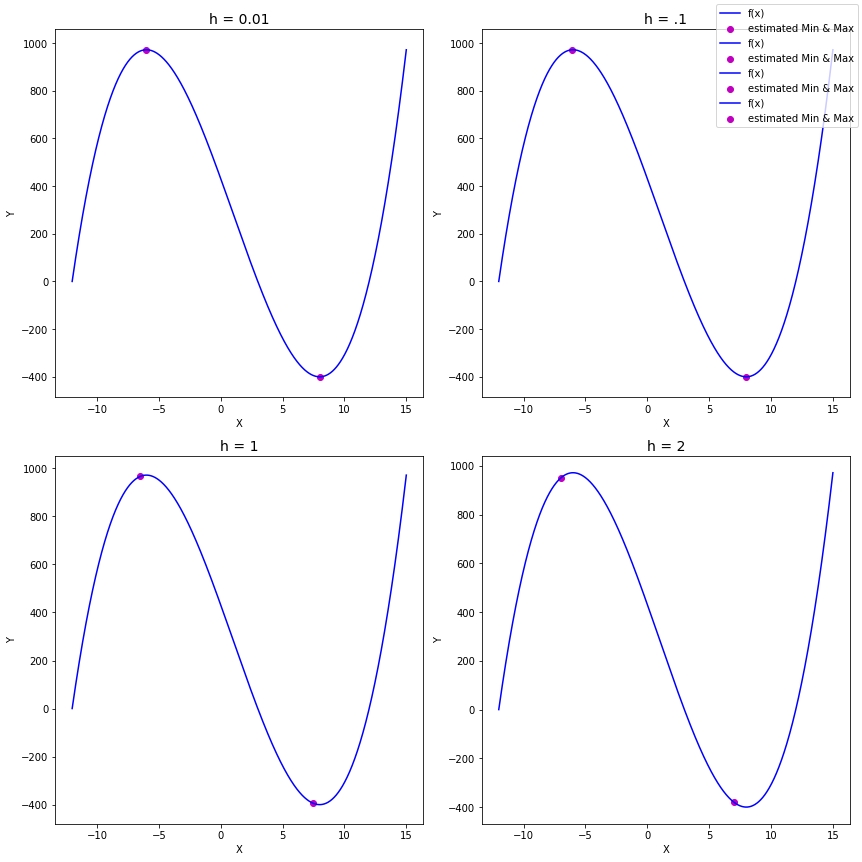

In [15]:
#sorry Dr.Bukowy for the long ugly code ... my apologies
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes[0,0].plot(X, f(X), c='b', label='f(x)')
axes[0,1].plot(X, f(X), c='b', label='f(x)')
axes[1,0].plot(X, f(X), c='b', label='f(x)')
axes[1,1].plot(X, f(X), c='b', label='f(x)')
axes[0,0].scatter(h001_left, f(h001_left), c='m', label='estimated Min & Max')
axes[0,0].scatter(h001_right, f(h001_right), c='m')
axes[0,1].scatter(h01_left, f(h01_left), c='m', label='estimated Min & Max')
axes[0,1].scatter(h01_right, f(h01_right), c='m')
axes[1,0].scatter(h1_left, f(h1_left), c='m', label='estimated Min & Max')
axes[1,0].scatter(h1_right, f(h1_right), c='m')
axes[1,1].scatter(h2_left, f(h2_left), c='m', label='estimated Min & Max')
axes[1,1].scatter(h2_right, f(h2_right), c='m')
axes[0,0].set_title('h = 0.01', fontsize=14)
axes[0,1].set_title('h = .1', fontsize=14)
axes[1,0].set_title('h = 1', fontsize=14)
axes[1,1].set_title('h = 2', fontsize=14)
axes[0,0].set_xlabel("X")
axes[0,1].set_xlabel("X")
axes[1,0].set_xlabel("X")
axes[1,1].set_xlabel("X")
axes[0,0].set_ylabel("Y")
axes[0,1].set_ylabel("Y")
axes[1,0].set_ylabel("Y")
axes[1,1].set_ylabel("Y")
fig.legend(loc=1)
fig.tight_layout()

## Experiment 3 - Guassian Model Grid Search -- Derivative Space

### 1) Load the cost function, load the gaussdisct.csv

In [16]:
gauss_data = np.loadtxt("gaussdist.csv", delimiter=',')

In [17]:
cost = GaussianCostFunction(gauss_data[:,0], gauss_data[:,1])

In [18]:
numerical_differentiation = NumericalDifferentiation(.00001)

## 3) Perform a grid search on the model parameters

In [19]:
mu = np.linspace(5,6,100)
sigma = np.linspace(1,1.75,100)
xx, yy = np.meshgrid(mu, sigma)
x = np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])
grad = np.zeros(x.shape)
for i in range(xx.size):
    grad[i] = numerical_differentiation.gradient(cost, x[i])

### 4) Generate heatmaps for each of the two derivatives arrays

Text(32.99999999999999, 0.5, 'Sigma Values')

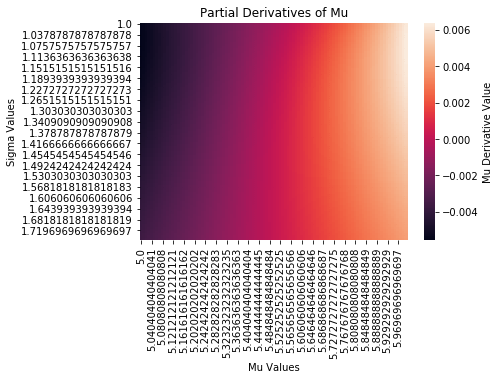

In [20]:
mu_data = grad[:,0].reshape(xx.shape)
dataframe = pd.DataFrame(data=mu_data,columns=mu, index=sigma)
sns.heatmap(dataframe, cbar_kws={'label': 'Mu Derivative Value'})
plt.title('Partial Derivatives of Mu')
plt.xlabel('Mu Values')
plt.ylabel('Sigma Values')

Text(32.99999999999999, 0.5, 'Sigma Values')

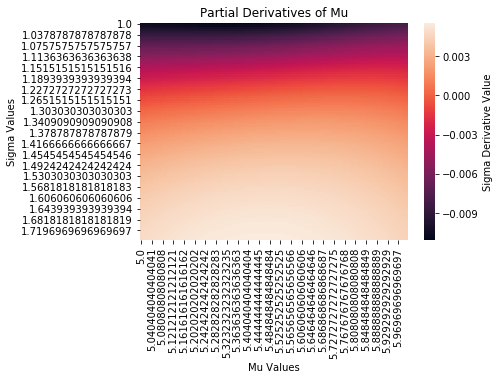

In [21]:
sigma_data = grad[:,1].reshape(xx.shape)
dataframe = pd.DataFrame(data=sigma_data,columns=mu, index=sigma)
sns.heatmap(dataframe, cbar_kws={'label': 'Sigma Derivative Value'})
plt.title('Partial Derivatives of Mu')
plt.xlabel('Mu Values')
plt.ylabel('Sigma Values')

### 5) Find the locations in the derivative  arrays that equal zero

In [22]:
mu_zero = x[np.abs(mu_data).argmin(), 0]
sigma_zero = x[np.abs(sigma_data).argmin(), 1]
parameters = np.asarray([mu_zero, sigma_zero])
print("Mu Zero Value: " + str(mu_zero))
print("Sigma Zero Value: " + str(sigma_zero))

Mu Zero Value: 5.474747474747475
Sigma Zero Value: 1.2727272727272727


### 6) Use the cost_function.predict() method with the found parameter values and plot the output

Error:  8.993647700082753e-06


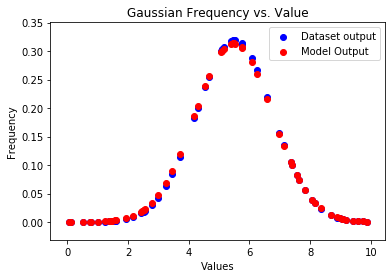

In [23]:
total_output = cost.predict(gauss_data[:,0], np.asarray([mu_zero, sigma_zero]))
plt.scatter(gauss_data[:,0], gauss_data[:,1], color='b', label='Dataset output')
plt.scatter(gauss_data[:,0], total_output, color='r', label='Model Output')
plt.title("Gaussian Frequency vs. Value")
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
print("Error: ", cost.cost(parameters))